<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree 

from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  LogisticRegression

from sklearn.ensemble import RandomForestClassifier

# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [ ]:
data = sns.load_dataset("mpg")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Question 1
 - Drop the rows with missing values
 - Drop the "name" column
 - Transform the "origin" column to represent the following :
    - USA = 0, Japan = 1, Europe = 2

In [ ]:
# Missing values
data[data.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [ ]:
# drop missing values
data.dropna(inplace=True)

In [ ]:
# Transform the "origin" column to represent the following : USA = 0, Japan = 1, Europe = 2
data['origin'] = data['origin'].factorize()[0]

In [ ]:
# transform data['origin'] str to int
#data.astype({'origin': int})

In [ ]:
type(data['origin'][0])

numpy.int64

In [ ]:
# Drop the "name" column
data_clean = data.drop('name',axis = 1, inplace=True)

## Question 2

Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%

In [ ]:
vars = ['cylinders',	'displacement', 'horsepower',	'weight',	'acceleration',	'model_year',	'origin']

X = data[vars]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.80)


## Question 3 

Fit a decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Déclarer le classifieur
dtree = DecisionTreeRegressor()

In [ ]:
# entraine le classifieur
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

## Question 4

Predict on the xtest set

In [ ]:
# INSERT CODE HERE
dtree.predict(X_test)


array([23. , 19. , 38.1, 33. , 27.9, 28. , 12. , 31.5, 18. , 31. , 15. ,
       20. , 15.5, 28. , 17. , 27. , 18. , 32.4, 31.3, 34. , 23.8, 34. ,
       35.1, 18. , 31. , 28. , 20. , 18. , 27. , 23. , 16. , 20.2, 23. ,
       28. , 14. , 31. ,  9. , 23. , 14. , 12. , 14. , 27. , 34. , 26. ,
       16. , 11. , 18. , 46.6, 23. , 33. , 14. , 21. , 21. , 34. , 38. ,
       16. , 22. , 19. , 24. , 23. , 11. , 22. , 28.4, 23. , 23.9, 26. ,
       25. , 33. , 23. , 14. , 23. , 14. , 22. , 19. , 20.5, 24. , 13. ,
       18. , 24. ])

## Question 5 
Print out the R2 score

In [ ]:
# INSERT CODE HERE
R2_score = dtree.score(X_train, y_train)
R2_score

1.0

In [ ]:
R2_score = dtree.score(X_test, y_test)
R2_score

0.7703291988165664

## Question 6

Print each feature with importance %

In [ ]:
# INSERT CODE HERE
features_percent = dtree.feature_importances_*100
features_percent

#possibilité de faire une boucle pour afficher à quels features ça correpsond

array([ 0.4326295 , 62.98051762, 17.10593772,  6.28746087,  2.4491137 ,
       10.43747264,  0.30686795])

## Question 7 

- Plot the results
- Use column names as feature names and a max_depth of only 2

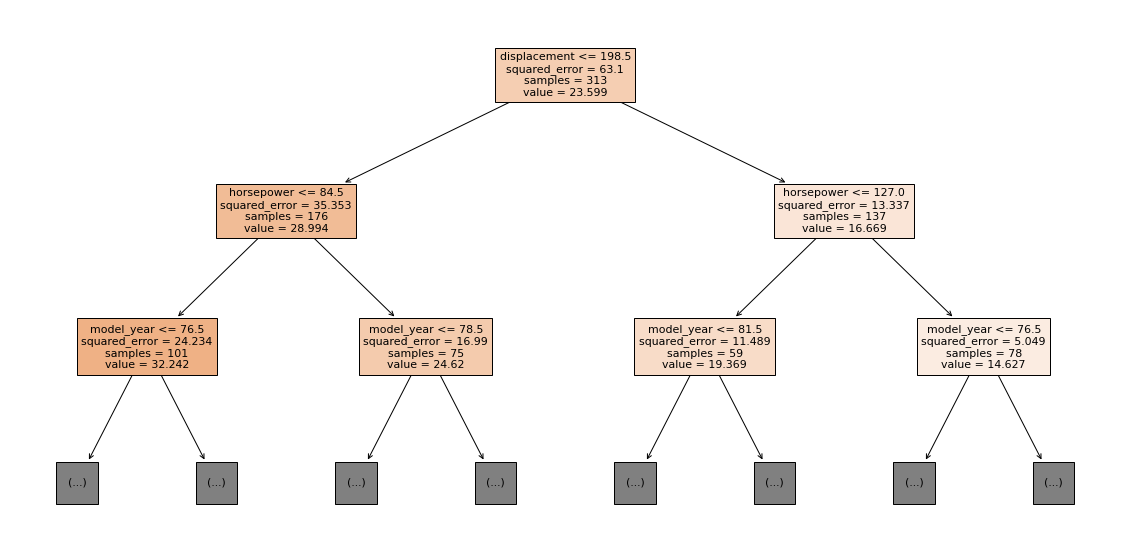

In [ ]:
# INSERT CODE HERE
fig = plt.figure(figsize=(20,10))

plot_tree(dtree, filled = True,             
          feature_names=X_train.columns,
          max_depth =2)

plt.show()

# Classification Trees

In [ ]:
# Load in the Penguins dataset
df_Penguins = sns.load_dataset('penguins')

# Drop rows with missing values
df_Penguins.dropna(inplace=True)

In [ ]:
df_Penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
# Turn the species column into numeric - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
df_Penguins['species'] = df_Penguins['species'].factorize()[0]

# Turn the island column into numeric - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2
df_Penguins['island'] = df_Penguins['island'].factorize()[0]


In [ ]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets

penguin_vars = ['species',	'island'	,'bill_length_mm'	,'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']

X = df_Penguins[penguin_vars]
y = df_Penguins['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.80)


In [ ]:
# Using a random state of 42, fit the classification tree.

# Déclarer le classifieur
penguins_DTC = DecisionTreeClassifier(random_state=42)

# entraine le classifieur
penguins_DTC.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Print the predictions on the test set
penguins_DTC.predict(X_test)


array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

In [ ]:
# Print the accuracy score for the predictions
accuracy_score = penguins_DTC.score(X_train, y_train)
accuracy_score


1.0

In [ ]:
accuracy_score = penguins_DTC.score(X_test, y_test)
accuracy_score

0.8805970149253731

In [ ]:
# Print each feature with importance %
features_percent = penguins_DTC.feature_importances_*100
features_percent

#possibilité de faire une boucle pour afficher à quels features ça correpsond


array([ 0.        ,  0.        ,  9.23920871, 48.1776664 ,  2.40942029,
       40.1737046 ])

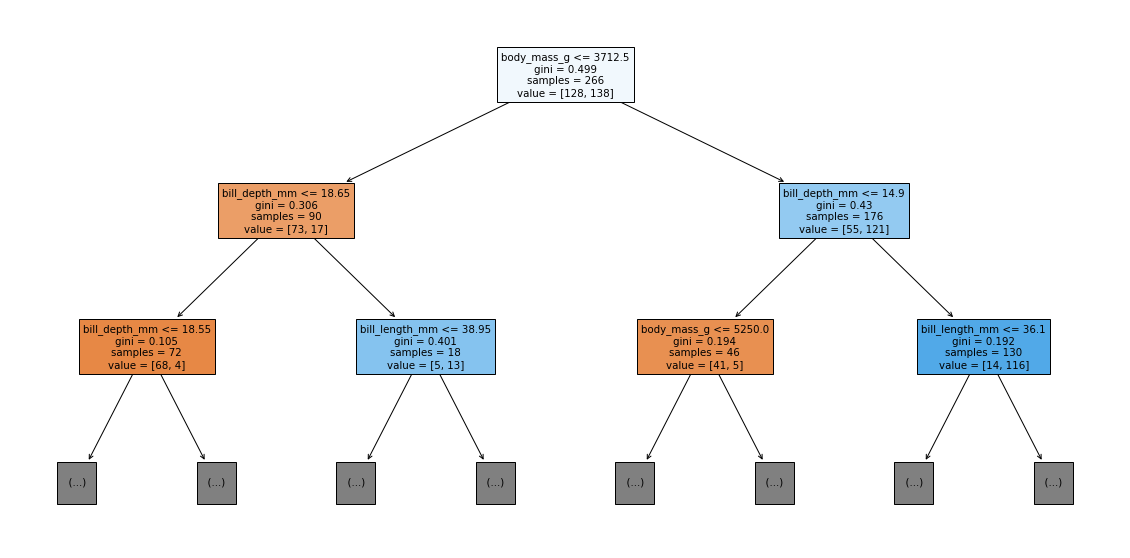

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2

fig = plt.figure(figsize=(20,10))

plot_tree(penguins_DTC, filled = True,             
          feature_names=X_train.columns,
          max_depth =2)

plt.show()


# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

###Dans cette section, nous allons voir comment le changement de max_depth, qui est l'un des hyperparamètres les plus importants lorsqu'il s'agit d'arbres de décision, joue un rôle dans la précision de la prédiction.

###* Cet exercice n'est fait que pour que vous puissiez voir à quel point le choix de la profondeur max_correcte a un impact ! Recherche aléatoire, optimisation bayésienne).

###En utilisant l'ensemble de données ci-dessus, ajustez et prédisez les ensembles de train et de test en utilisant un max_depth de 1 à 10. Par exemple, dans la première itération, vous ajusteriez les ensembles de données xtrain et ytrain en utilisant max_depth=1, prédiez le xtest en utilisant ce modèle, et puis enregistrez la précision. À l'itération suivante, le max_depth serait alors 2, etc.

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.

# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

list_of_accuracies = []
list_of_max_depth = []

for i in range(1, 11):

  penguins_DTC = DecisionTreeClassifier(random_state=42, max_depth=i)
  penguins_DTC.fit(X_train, y_train)
  penguins_DTC.predict(X_test)
  list_of_accuracies.append(round(penguins_DTC.score(X_test, y_test),2))
  list_of_max_depth.append(i)

print(list_of_accuracies)
print(list_of_max_depth)


[0.7, 0.82, 0.84, 0.87, 0.84, 0.81, 0.87, 0.88, 0.88, 0.88]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.

data = list_of_accuracies

#linechart 
fig = px.line(data, y=list_of_accuracies, x=list_of_max_depth, text=list_of_accuracies)

fig.update_layout(title_text ='<b>Accuracies with max_depth between 1 and 10<b>', 
                  title_x = 0.5,
                  font=dict(family='Arial',size=18, color='forestgreen'),
                  width = 900, height = 500,
                  template='plotly_dark',
                  title_font_color="hotpink",
                  font_size=14)

fig.update_traces(textposition="bottom right")

fig.show()
